### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.getcwd())

import constants
from human_eval_utils import parse_python_code, construct_test_program, code_runs_without_errors, save_results, get_erratic_problems, test_humaneval_parallel
from generic_agents.CodeInterpreterAgent import CodeInterpreterAgent
from utils import print_dict

### Loading the HumanEval Dataset

In [2]:
from human_eval_utils import load_human_eval

dataset = load_human_eval()

print(len(dataset))
task = dataset[-131]
# print a random example
print(task.keys())
print(task['prompt'])
print(task['entry_point'])
# print(task['test'])

164
dict_keys(['task_id', 'prompt', 'canonical_solution', 'test', 'entry_point'])


def sort_third(l: list):
    """This function takes a list l and returns a list l' such that
    l' is identical to l in the indicies that are not divisible by three, while its values at the indicies that are divisible by three are equal
    to the values of the corresponding indicies of l, but sorted.
    >>> sort_third([1, 2, 3])
    [1, 2, 3]
    >>> sort_third([5, 6, 3, 4, 8, 9, 2])
    [2, 6, 3, 4, 8, 9, 5]
    """

sort_third


### LangChain AgentCoder+

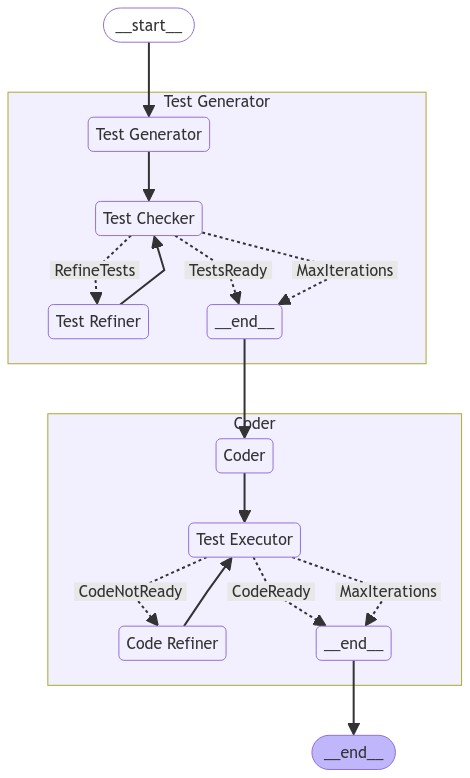

In [7]:
from langgraphs.agent_coder_plus import get_agent_coder_plus_graph
from IPython.display import Image, display

graph = get_agent_coder_plus_graph()
app = graph.compile()
display(Image(app.get_graph(xray=True).draw_mermaid_png())) 

def agent_coder_plus(task_prompt, max_iterations=3, passed_tests_threshold=0.7):
    graph = get_agent_coder_plus_graph()
    app = graph.compile()
    
    config = {"recursion_limit": 50}
    inputs = {
        "incomplete_method": task_prompt,
        "max_iterations": max_iterations,
        "passed_tests_threshold": passed_tests_threshold,
    }

    for event in app.stream(inputs, config=config):
        pass
        # print_dict(event)
    
    last_event_name = list(event.keys())[0]
    return event[last_event_name]['completed_method']

#### Sequential Execution

In [ ]:
n_tasks = None
# task_numbers = range(n_tasks)
task_numbers = get_erratic_problems(file_path=constants.HUMAN_EVAL_SINGLE_AGENT_DIR)
task_numbers = task_numbers[:n_tasks] if n_tasks is not None else task_numbers
print(task_numbers)
n_tasks = len(task_numbers)
passed_tests_threshold = 0.7
max_iterations = 6

results = {
    "score": 0, 
    "test_counts": {"NoError": 0, "Error": 0, "AssertionError": 0, "IncorrectInput": 0}, 
    "erratic_problems": [],
    "tests_results": {}
}

n_correct = 0
for task_number in task_numbers:
    task = dataset[task_number]
    
    completion = agent_coder_plus(task['prompt'], max_iterations=max_iterations, passed_tests_threshold=passed_tests_threshold)

    test_path = constants.HUMAN_EVAL_AGENT_CODER_DIR + 'test_files/' + f'problem_{task_number}.py'
    test_program = construct_test_program(task['prompt'], completion, task['test'], task['entry_point'], save_path=test_path)
    (code_works, reason) = code_runs_without_errors(file_path=test_path)
    
    print(f'Problem {task_number} - Tests Passed: {code_works}' + f' - Reason: {reason if not code_works else ""}')
    print('\n-----------------------------------\n')
    if code_works:
        n_correct += 1
    else:
        results["erratic_problems"].append(task_number)
    if reason in results["test_counts"]:
        results["test_counts"][reason] += 1
    else:
        results["test_counts"][reason] = 1
    results["tests_results"][task_number] = (code_works, reason)

results["score"] = round(n_correct/n_tasks * 100, 4)
save_results(results, constants.HUMAN_EVAL_AGENT_CODER_PLUS_DIR)
print(f'Correct: {n_correct}/{n_tasks}')
print(results)

#### Parallel Execution

In [8]:
# Usage
n_tasks = len(dataset)
task_numbers = range(n_tasks)
# task_numbers = get_erratic_problems(file_path=constants.HUMAN_EVAL_SINGLE_AGENT_DIR)
task_numbers = task_numbers[:n_tasks] if n_tasks is not None else task_numbers
passed_tests_threshold = 0.7
max_iterations = 6

results = test_humaneval_parallel(agent_coder_plus, task_numbers, dataset, max_iterations, passed_tests_threshold)
save_results(results, constants.HUMAN_EVAL_AGENT_CODER_PLUS_DIR) 

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestChecker
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentCoder
In AgentCoder
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestChecker
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentTestChecker
In AgentTestChecker
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestRefiner
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentTestRefiner
In AgentTestExecutor, with thread id:  Thread(id='thread_DpV9YJImiq38PeRIWNjGPbj5', created_at=1724330458, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
In AgentTestExecutor, with thread id:  Thread(id='thread_2WxWzvZY2OayCQgqxrHb3jsl', created_at=1724330458, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
In AgentTestExecutor, with thread id: In AgentTestExecutor, with thread id:  Thread(id='thread_Nogum9VjDmBtrihsa84eVSlM', created_at=1724330457, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
 Thread(id='thread_kgYss7oFQSh6cEB8ONpmAqh0', created_at=1724330458, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
In AgentTestExecutor, with thread id:  Thread(id='thread_RtoNS00FhgU9lRIkrikRKmQ3', created_at=1724330458, metadata={}, object='thread

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
_run_agent Failed. Run status: failed
Attempt 0 failed


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
In AgentTestExecutor, with thread id:  Thread(id='thread_rPVrV2gNELWSjoBeO50vQvIk', created_at=1724330458, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
_run_agent Failed. Run status: failed
Attempt 1 failed
In AgentTestExecutor, with thread id:  Thread(id='thread_24cspK

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
_run_agent Failed. Run status: failed
Attempt 0 failed


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestRefiner
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
_run_agent Failed. Run status: failed
Attempt 1 failed
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestExecutor, with thread id:  Thread(id='thread_XeofLtiJ7ZwkKSb4tqVlHwl0', created_at=1724330494, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentCoder
In AgentTestChecker
_run_agent Failed. Run status: failed
Attempt 1 failed
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts
In AgentTestChecker
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentTestChecker
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestRefiner


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoderIn AgentTestGenerator

In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


_run_agent Failed. Run status: failed
Attempt 0 failed
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestChecker
In AgentTestRefiner
_run_agent Failed. Run status: failed
Attempt 1 failed


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentCoder
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentTestChecker
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentCoder
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker
_run_agent Failed. Run status: failed
Attempt 2 failed
Failed to run agent after 3 attempts


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestRefiner


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentCoder
In AgentTestRefiner


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestRefiner
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentCoder
In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGeneratorIn AgentTestGenerator



CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestChecker
In AgentTestGenerator
In AgentTestGenerator


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentTestGenerator
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentCoder
In AgentTestRefiner
In AgentTestChecker


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentCoder
In AgentTestExecutor, with thread id:  Thread(id='thread_kRZdYFoXgvzWbXjbfFTOm8Kl', created_at=1724330557, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
In AgentTestExecutor, with thread id:  Thread(id='thread_o8E4xoAthDJzXqTYvld0jgcB', created_at=1724330555, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
In AgentTestExecutor, with thread id:  Thread(id='thread_3Is5ZexzK7KFpXgqflCKKxfE', created_at=1724330557, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
_run_agent Failed. Run status: failed
Attempt 0 failed
_run_agent Failed. Run status: failed
Attempt 1 failed
Current iterations: 2
Tests passed: True. Proportion tests passed: 1.0
Feedback: 
The c

AttributeError: 'NoneType' object has no attribute 'content'